<a href="https://colab.research.google.com/github/roscibely/Financial-analysis/blob/main/Stock_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction using Machine Learning

## 1. Datasets and Frameworks Used for the Experiment

This case is based on the stock Facebook dataset from Yahoo Finance. Each data record contains detailed information about the FB stock. Specifically, it includes dates, open, high, low, close prices, and  volume. 

Framework: Sklearn, which provides data set segmentation, standardization, and evaluation functions, and integrates various common machine learning algorithms. 

## Installation Command

In [ ]:
!pip install yfinance
!pip install mplfinance


## Importing Libraries

In [107]:
import plotly.graph_objects as go         # To plot the candlestick
import pandas as pd                       # structures and data analysis
import datetime as dt                     # 
import yfinance as yf                     # Yahoo! Finance market data downloader
import seaborn as sns
import scipy.stats as st
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

                                          # Introduce algorithms
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR               # Compared with SVC, it is the regression form of SVM.
                                          # Integrate algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Loading the Data Set, Viewing Data Attributes, and Visualizing the Dat

In [108]:
'''
The below code shows how to get data for FB from today
 to last 300 days.
'''
actual_date = dt.date.today()                            # Take the actual date
last_month_date = actual_date-dt.timedelta(days=300) 
actual_date = actual_date.strftime("%Y-%m-%d") 
last_month_date = last_month_date.strftime("%Y-%m-%d")
'''
Stock data from https://finance.yahoo.com/quote/FB/news?ltr=1
'''
stock='FB'                                               # Stock name
data = yf.download(stock, last_month_date, actual_date)  # Getting data from Yahoo Finance
da= pd.DataFrame(data=data)
da.to_csv('file.csv')
df = pd.read_csv('/content/file.csv')

df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-04,200.199997,205.910004,198.759995,205.259995,205.259995,19250700
1,2020-05-05,207.020004,210.380005,206.500000,207.070007,207.070007,21071200
2,2020-05-06,208.119995,211.600006,206.660004,208.470001,208.470001,21857000
3,2020-05-07,211.160004,211.600006,209.039993,211.259995,211.259995,15152000
4,2020-05-08,212.240005,213.210007,210.850006,212.350006,212.350006,12506000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       207 non-null    object 
 1   Open       207 non-null    float64
 2   High       207 non-null    float64
 3   Low        207 non-null    float64
 4   Close      207 non-null    float64
 5   Adj Close  207 non-null    float64
 6   Volume     207 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.4+ KB


In [110]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,207.000000,207.000000,207.000000,207.000000,207.000000,2.070000e+02
mean,257.818744,261.642368,253.986957,257.833188,257.833188,2.204322e+07
std,21.966789,22.045165,21.407004,21.608719,21.608719,1.026915e+07
min,200.199997,205.910004,198.759995,205.100006,205.100006,6.702000e+06
25%,240.159996,243.690002,236.750000,240.279999,240.279999,1.563820e+07
50%,263.059998,267.910004,260.010010,263.519989,263.519989,1.937360e+07
75%,273.985001,277.730011,269.500000,273.354996,273.354996,2.503030e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,7.634390e+07


## Candlestick Charts

[*********************100%***********************]  1 of 1 completed


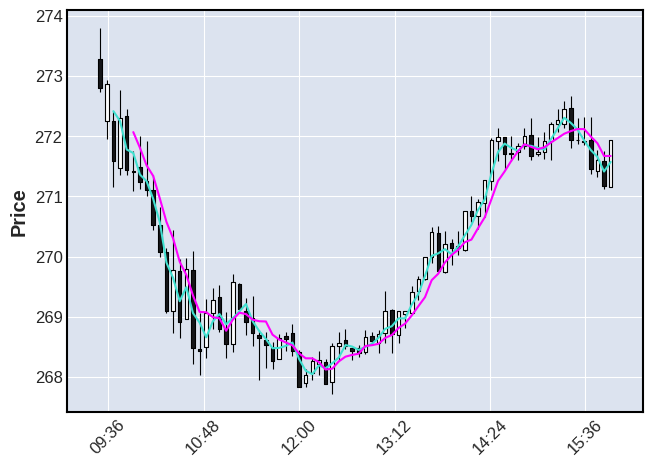

In [100]:
#Stock price with interval of 5min
data = yf.download(tickers=stock, start=dt.datetime(2021, 2,10), end=dt.datetime(2021, 2, 11), interval="5m")
mpf.plot(data,type='candle',mav=(3,6),volume=False,show_nontrading=True) # mav(3,6) moving average trend for 3 day and 6 day moving average price  

In [111]:
x = df[['High', 'Low', 'Open', 'Volume']].values  # x features
y = df['Close'].values                            # y labels

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



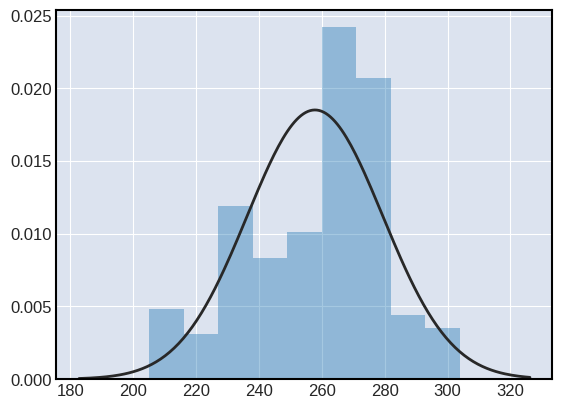

In [112]:
#Visualize label distribution.
sns.distplot(tuple(y), kde=False, fit=st.norm)
plt.show()

## Spliting and Pre-processing the Data Set

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28) # Segment the data
ss = StandardScaler()                                 # Standardize the data set
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[-0.37100616, -0.24121178, -0.29580887, -0.88110129],
       [ 0.68810125,  0.76771166,  0.77291931, -0.75010306],
       [-0.86840636, -0.96379526, -0.75333341,  1.08472196],
       [ 0.80534204,  0.62319497,  0.81594994,  0.26788989],
       [ 0.2160742 ,  0.22869108,  0.21308832, -0.32960584],
       [ 0.24625952,  0.23542432,  0.23723735, -0.6224352 ],
       [-0.6676086 , -0.62045563, -0.5812129 ,  0.08896737],
       [ 0.78740574,  0.82381284,  0.90859583, -0.63423315],
       [ 0.57829666,  0.73764083,  0.62846058, -0.91045943],
       [ 0.11895652,  0.12366983,  0.15600805,  0.81458021],
       [ 0.94926899,  0.98269177,  1.00738954, -0.52268004],
       [-1.13132367, -1.0836273 , -1.17265793, -0.14224506],
       [ 0.81146588,  0.73046108,  0.63021729,  0.27270478],
       [ 0.74409695,  0.89562263,  0.91298693, -1.1407831 ],
       [ 0.74147226,  0.80182162,  0.83878178, -0.52528769],
       [ 0.72178572,  0.70128737,  0.62099692,  0.15761619],
       [-1.45504883, -1.

## Using Various Regression Models to Model Data Sets

In [114]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']

#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):
        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score

#Traverse all models to score.
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LinerRegression: 0.969042, 0.0000
Ridge: 0.969052, 0.0000
Lasso: 0.969070, 0.0000
Random Forrest: 0.960855, 0.0000
Support Vector Regression: 0.795493, 0.0000
ElasticNet: 0.969781, 0.0000
[22:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost: 0.959480, 0.0000


## Building the model with Support Vector Regression (SVR)

In [115]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
##Obtain optimal parameters.
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)

Optimal parameter list: {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}
Optimal model: SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Optimal R2 value: 0.9844064927293434


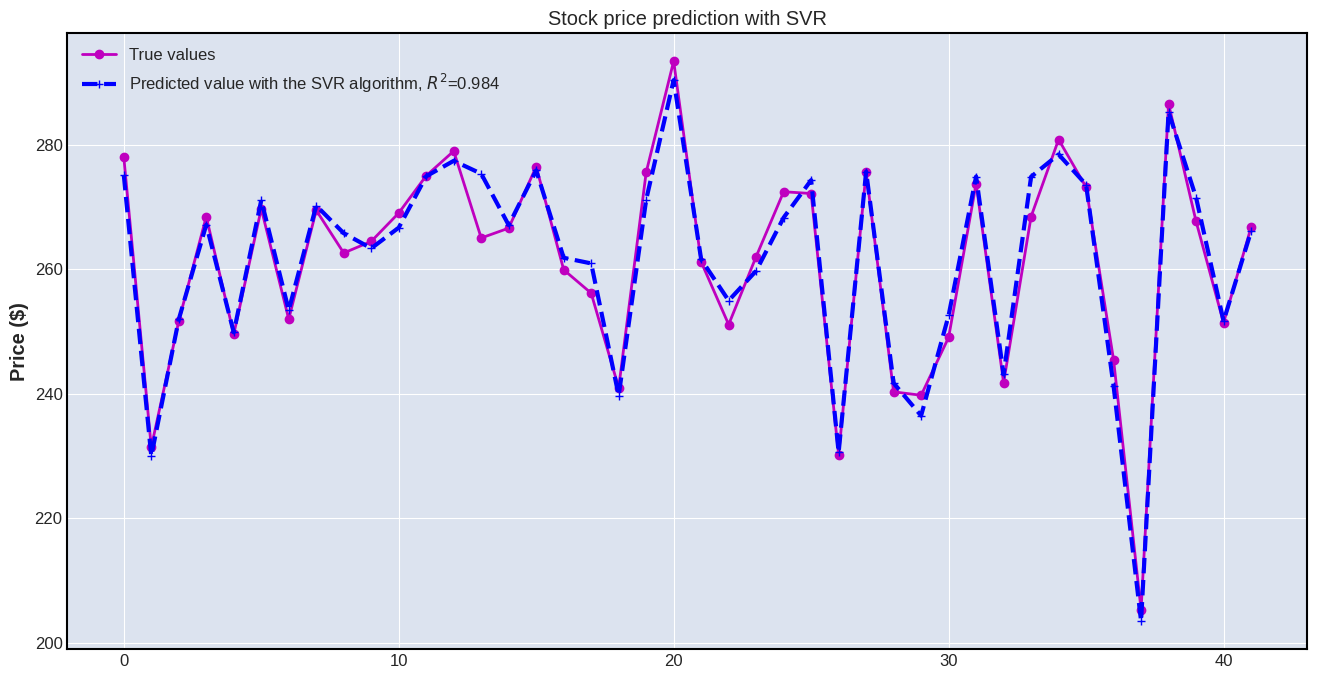

In [121]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)
#Set the canvas.
plt.figure(figsize=(16,8))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value with the SVR algorithm, $R^2$=%.3f' % (model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()